# Libs

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from tqdm import tqdm
from pathlib import Path

from mbp.data_objects.sit import SITCondition, SITVersion
from mbp.preprocessing.loader import Loader

from scripts.datasets import sit_datasets

# Loading data

In [2]:
VERSION = 'acii23'
FEATURES_FILENAME = f'audiovisual_features_v_{VERSION}.csv'

In [3]:
data = pd.DataFrame()
for dataset in sit_datasets.values():
    features = pd.read_csv(dataset.processed / FEATURES_FILENAME)
    data = pd.concat([data, features]).reset_index(drop=True)

In [4]:
data.describe()

,SITCondition.ASD,facial_AU01_c_mean_disgust_actress,facial_AU02_c_mean_disgust_actress,facial_AU04_c_mean_disgust_actress,facial_AU05_c_mean_disgust_actress,facial_AU06_c_mean_disgust_actress,facial_AU07_c_mean_disgust_actress,facial_AU09_c_mean_disgust_actress,facial_AU10_c_mean_disgust_actress,facial_AU12_c_mean_disgust_actress,...,audio_slopeUV0-500_sma3nz_amean_disgust,audio_slopeUV500-1500_sma3nz_amean_disgust,audio_spectralFluxUV_sma3nz_amean_disgust,audio_loudnessPeaksPerSec_disgust,audio_VoicedSegmentsPerSec_disgust,audio_MeanVoicedSegmentLengthSec_disgust,audio_StddevVoicedSegmentLengthSec_disgust,audio_MeanUnvoicedSegmentLength_disgust,audio_StddevUnvoicedSegmentLength_disgust,audio_equivalentSoundLevel_dBp_disgust
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.506098,0.339727,0.192444,0.217511,0.293540,0.281194,0.327439,0.205989,0.386857,0.380542,...,0.045086,-0.001788,0.160862,2.006644,1.561844,0.417473,0.526344,1.330633,0.706153,-23.158009
std,0.501494,0.424172,0.329335,0.356333,0.342472,0.358857,0.392148,0.358187,0.420325,0.401484,...,0.036334,0.007436,0.118905,0.689346,0.800333,0.238505,0.346953,5.678066,0.636825,17.469581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.018269,-0.013433,0.000000,0.000000,0.000000,0.000000,0.000000,0.046750,0.000000,-120.000000
25%,0.000000,0.000000,0.000000,0.000000,0.001586,0.000000,0.000000,0.000000,0.000000,0.003648,...,0.019067,-0.006515,0.072219,1.659755,1.058682,0.223545,0.260963,0.186105,0.278291,-21.233702
50%,1.000000,0.042383,0.006333,0.000000,0.117311,0.089622,0.104603,0.000000,0.179501,0.170202,...,0.037944,-0.002616,0.132540,1.959898,1.359106,0.391119,0.449295,0.297337,0.515097,-19.542706
75%,1.000000,0.845041,0.217076,0.333100,0.546553,0.444562,0.680412,0.199683,0.900894,0.784459,...,0.063508,0.001091,0.215935,2.403846,1.878410,0.544012,0.747380,0.451306,0.958889,-18.345582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.164599,0.028635,0.611218,3.671381,5.406213,1.211579,1.948093,33.399998,4.046466,-16.052258


# Training

In [5]:
model = XGBClassifier()
SETTING = 'baseline'

In [6]:
def save_predictions(predictions):
    output_path = Path('./results')
    output_path.mkdir(exist_ok=True)
    output_path = (output_path /
                   f'classification_predictions_v{VERSION}_{SETTING}.csv')
    with open(output_path, 'wb') as file:
        pickle.dump(predictions, file)
    print('Classification predictions saved successfully...')

100%|██████████| 164/164 [01:37<00:00,  1.67it/s]


Metrics for modality: all
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        81
           1       0.69      0.67      0.68        83

    accuracy                           0.68       164
   macro avg       0.68      0.68      0.68       164
weighted avg       0.68      0.68      0.68       164

Confusion matrix: 
[[56 25]
 [27 56]]


100%|██████████| 164/164 [00:51<00:00,  3.19it/s]


Metrics for modality: facial
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        81
           1       0.72      0.76      0.74        83

    accuracy                           0.73       164
   macro avg       0.73      0.73      0.73       164
weighted avg       0.73      0.73      0.73       164

Confusion matrix: 
[[56 25]
 [20 63]]


100%|██████████| 164/164 [00:38<00:00,  4.22it/s]


Metrics for modality: audio
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        81
           1       0.65      0.66      0.66        83

    accuracy                           0.65       164
   macro avg       0.65      0.65      0.65       164
weighted avg       0.65      0.65      0.65       164

Confusion matrix: 
[[52 29]
 [28 55]]


100%|██████████| 164/164 [00:14<00:00, 11.51it/s]


Metrics for modality: gaze
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        81
           1       0.61      0.63      0.62        83

    accuracy                           0.61       164
   macro avg       0.61      0.61      0.61       164
weighted avg       0.61      0.61      0.61       164

Confusion matrix: 
[[48 33]
 [31 52]]


100%|██████████| 164/164 [00:14<00:00, 11.06it/s]


Metrics for modality: head
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        81
           1       0.69      0.67      0.68        83

    accuracy                           0.68       164
   macro avg       0.68      0.68      0.68       164
weighted avg       0.68      0.68      0.68       164

Confusion matrix: 
[[56 25]
 [27 56]]


FileNotFoundError: [Errno 2] No such file or directory: '/homes/wsaakyan/projects/remote/acii23_sit_autisim_detection/notebooks/results/roc_v_acii23_baseline.png'

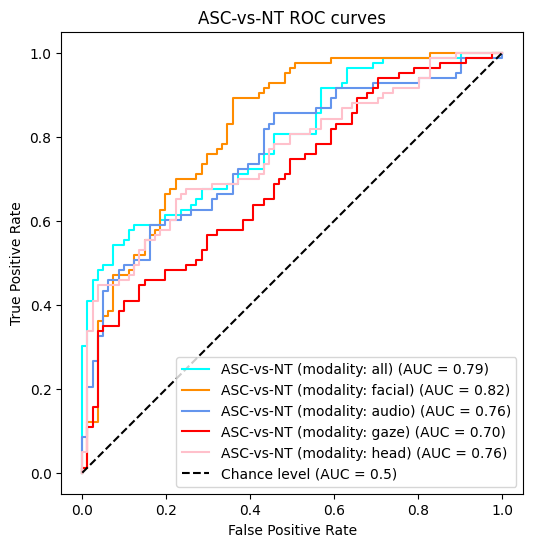

In [8]:
modalities = ['all', 'facial', 'audio', 'gaze', 'head']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue',
                'red', 'pink', 'green'])
# output_path = Path('results') /
# f'classification_predictions_v{VERSION}.csv'
# with open(output_path, 'rb') as file:
#     for_metrics = pickle.load(file)
for_metrics = {}
fig, ax = plt.subplots(figsize=(6, 6))

def helper(index, modality, gt, pred, prob):
    for_metrics[modality]['index'].append(index)
    for_metrics[modality]['gt'].append(gt)
    for_metrics[modality]['pred'].extend(pred)
    for_metrics[modality]['probs'].append(prob)

for modality, color in zip(modalities, colors):
    for_metrics[modality] = {
        'index': [],
        'gt': [],
        'pred': [],
        'probs': [],
    }
    cols = [col for col in data.columns if
            col.startswith(modality.replace('all', ''))]
    input_data = data[cols] if modality != 'all' else (
        data[cols].drop(columns=['id', str(SITCondition.ASD)]))
    labels = data[str(SITCondition.ASD)]
    loo = LeaveOneOut()
    for train_index, val_index in tqdm(loo.split(input_data),
                                       total=len(input_data)):
        train_x = input_data.loc[train_index]
        train_y = labels.loc[train_index]
        val_x = input_data.loc[val_index]
        val_y = labels.loc[val_index]
        model.fit(train_x, train_y)
        val_pred = model.predict(val_x)
        val_score = model.predict_proba(val_x)[0]
        helper(val_index, modality, val_y, val_pred, val_score)
    print(f'Metrics for modality: {modality}')
    print(classification_report(for_metrics[modality]['gt'],
                                for_metrics[modality]['pred']))
    print(f"Confusion matrix: \n{confusion_matrix(
        for_metrics[modality]['gt'], for_metrics[modality]['pred'])}")
    RocCurveDisplay.from_predictions(
        for_metrics[modality]['gt'],
        np.array(for_metrics[modality]['probs'])[:, 1],
        name=f"ASC-vs-NT (modality: {modality})",
        color=color,
        ax=ax,
    )
# save_predictions(for_metrics)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ASC-vs-NT ROC curves")
plt.legend()
plt.savefig(Path(f'./results/roc_v_{VERSION}_{SETTING}.png'))
plt.show()